In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas 库简介

## 什么是Pandas？
Pandas是一个强大的分析结构化数据的工具集，基于NumPy构建，提供了**高级数据结构和数据操作工具**，它是使Python成为强大而高效的数据分析环境的重要因素之一。
* 一个强大的分析和操作大型结构化数据集所需的工具集
* 基础是NumPy，提供了高性能矩阵的运算
* 提供了大量能够快速便捷地处理数据的函数和方法
* 应用于数据挖掘，数据分析
* 提供数据清洗功能

## 为什么使用Pandas
Numpy已经能够帮助我们处理数据，能够结合matplotlib解决部分数据展示等问题，那么pandas学习的目的在什么地方呢？

numpy能够帮我们处理处理数值型数据，但是这还不够， 很多时候，我们的数据除了数值之外，还有字符串，还有时间序列等。

* 增强图表可读性
* 便捷的数据处理能力
* 读取文件方便
* 封装了matplotlib的画图和numpy的计算能力

# Pandas 数据结构

Pandas中一共有三种数据结构，分别为：Series、DataFrame和MultiIndex。

其中Series是一维数据结构，DataFrame是二维的表格型数据结构，MultiIndex是多维的数据结构，最主要的就是Series和DataFrame。

## Series
Series是一个类似于一维数组的数据结构，它能够保存任何类型的数据，比如整数、字符串、浮点数等，主要由一组**数据**和与之相关的**索引**两部分构成。

### Series的创建
pd.Series(data=None, index=None, dtype=None)
* data：传入的数据，可以是ndarray、list等
* index：索引，必须是唯一的，且与数据的长度相等。如果没有传入索引参数，则默认会自动创建一个从0-N的整数索引。
* dtype：数据的类型

In [2]:
# 指定内容，默认索引
pd.Series(np.arange(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [3]:
# 指定内容和索引
pd.Series([1,3,5,7,9],index=[5,4,3,2,1])

5    1
4    3
3    5
2    7
1    9
dtype: int64

In [4]:
# 通过字典数据创建,字典的key作为索引，value作为值
color_dict = {'red':10,'blue':20,'green':50,'yellow':1000}
color = pd.Series(color_dict)
color

red         10
blue        20
green       50
yellow    1000
dtype: int64

### Series的属性
为了更方便地操作Series对象中的索引和数据，Series中提供了两个属性**index**和**values**。方便演示，就沿用上面新建的color数组。

#### Series.index

In [5]:
# 查看color数组的索引
color.index

Index(['red', 'blue', 'green', 'yellow'], dtype='object')

#### Series.values

In [6]:
# 查看color数组的值
color.values

array([  10,   20,   50, 1000], dtype=int64)

## DataFrame
DataFrame是一个类似于二维数组或表格(如excel)的对象，既有行索引，又有列索引

* 行索引，表明不同行，横向索引，叫index，0轴，axis=0
* 列索引，表名不同列，纵向索引，叫columns，1轴，axis=1

### DataFrame的创建
pd.DataFrame(data=None, index=None, columns=None)
* index：行标签。如果没有传入索引参数，则默认会自动创建一个从0-N的整数索引。
* columns：列标签。如果没有传入索引参数，则默认会自动创建一个从0-N的整数索引。

In [7]:
# 创建一个2x3的符合标准正态分布的DataFrame
pd.DataFrame(np.random.randn(2,3))

,0,1,2
0,0.801237,0.102378,0.086167
1,-0.975879,-0.617448,0.183997


* **假设现在想要创建一个学生成绩表**

In [8]:
# 生成10名同学，5门课程的成绩数据
score = np.random.randint(40,100,(10,5))
score

array([[78, 58, 64, 66, 56],
       [52, 50, 95, 73, 60],
       [56, 44, 76, 89, 64],
       [44, 64, 53, 72, 58],
       [98, 99, 63, 88, 92],
       [46, 58, 76, 43, 68],
       [46, 90, 67, 43, 96],
       [65, 65, 85, 40, 93],
       [51, 61, 51, 48, 60],
       [57, 71, 86, 80, 94]])

* 但是这样的数据形式很难看到存储的是什么的样的数据，可读性比较差！


* 问题：如何让数据更有意义的显示？
我们使用DataFrame！

In [9]:
# 使用DataFrame来承接score数据
score_df = pd.DataFrame(score)
score_df

,0,1,2,3,4
0,78,58,64,66,56
1,52,50,95,73,60
2,56,44,76,89,64
3,44,64,53,72,58
4,98,99,63,88,92
5,46,58,76,43,68
6,46,90,67,43,96
7,65,65,85,40,93
8,51,61,51,48,60
9,57,71,86,80,94


* **给分数数据增加行列索引,显示效果更佳**

In [10]:
# 构造行索引，课程名称
subjects = ['语文','数学','英语','物理','化学']

# 构造列索引，学生名字
names = ['同学' + str(i) for i in range(score_df.shape[0])]

# 使用DataFrame，添加行列索引
score_data = pd.DataFrame(score,index=names, columns=subjects)
score_data

,语文,数学,英语,物理,化学
同学0,78,58,64,66,56
同学1,52,50,95,73,60
同学2,56,44,76,89,64
同学3,44,64,53,72,58
同学4,98,99,63,88,92
同学5,46,58,76,43,68
同学6,46,90,67,43,96
同学7,65,65,85,40,93
同学8,51,61,51,48,60
同学9,57,71,86,80,94


### DataFrame的属性
* df.shape:数组的形状
* df.index：行索引列表
* df.columns：列索引列表
* df.values：数组中的值
* df.T：转置
* df.head(n)：显示前n行,默认是5
* df.tail(n): 显示最后n行，默认是5

In [11]:
# 显示数组的形状（10行5列）
score_data.shape

(10, 5)

In [12]:
# 显示数组的行索引列表
score_data.index

Index(['同学0', '同学1', '同学2', '同学3', '同学4', '同学5', '同学6', '同学7', '同学8', '同学9'], dtype='object')

In [13]:
# 显示数组的列索引列表
score_data.columns

Index(['语文', '数学', '英语', '物理', '化学'], dtype='object')

In [14]:
# 显示数组的值
score_data.values

array([[78, 58, 64, 66, 56],
       [52, 50, 95, 73, 60],
       [56, 44, 76, 89, 64],
       [44, 64, 53, 72, 58],
       [98, 99, 63, 88, 92],
       [46, 58, 76, 43, 68],
       [46, 90, 67, 43, 96],
       [65, 65, 85, 40, 93],
       [51, 61, 51, 48, 60],
       [57, 71, 86, 80, 94]])

In [15]:
# 显示数组的转置矩阵
score_data.T

,同学0,同学1,同学2,同学3,同学4,同学5,同学6,同学7,同学8,同学9
语文,78,52,56,44,98,46,46,65,51,57
数学,58,50,44,64,99,58,90,65,61,71
英语,64,95,76,53,63,76,67,85,51,86
物理,66,73,89,72,88,43,43,40,48,80
化学,56,60,64,58,92,68,96,93,60,94


In [16]:
# 查看前5行内容
score_data.head(5)

,语文,数学,英语,物理,化学
同学0,78,58,64,66,56
同学1,52,50,95,73,60
同学2,56,44,76,89,64
同学3,44,64,53,72,58
同学4,98,99,63,88,92


In [17]:
# 查看最后5行内容
score_data.tail(5)

,语文,数学,英语,物理,化学
同学5,46,58,76,43,68
同学6,46,90,67,43,96
同学7,65,65,85,40,93
同学8,51,61,51,48,60
同学9,57,71,86,80,94


### DataFrame索引的设置

#### 修改行列索引值
必须整体全部修改，不能只修改某一个索引

In [18]:
# 现在想要把行索引改成“同学_1”
names_new = ['同学_' + str(i) for i in range(score_df.shape[0])]
score_data.index = names_new
score_data

,语文,数学,英语,物理,化学
同学_0,78,58,64,66,56
同学_1,52,50,95,73,60
同学_2,56,44,76,89,64
同学_3,44,64,53,72,58
同学_4,98,99,63,88,92
同学_5,46,58,76,43,68
同学_6,46,90,67,43,96
同学_7,65,65,85,40,93
同学_8,51,61,51,48,60
同学_9,57,71,86,80,94


In [19]:
# 不能修改某一个值,以下修改方式是错误的
score_data.index[0] = '学生_3'

TypeError: Index does not support mutable operations

#### 重设索引
df.reset_index(drop=False)
* 设置新的下标索引
* drop:默认为False，不删除原来索引，如果为True,删除原来的索引值

In [20]:
# 重置索引,drop=False
score_data.reset_index()

,index,语文,数学,英语,物理,化学
0,同学_0,78,58,64,66,56
1,同学_1,52,50,95,73,60
2,同学_2,56,44,76,89,64
3,同学_3,44,64,53,72,58
4,同学_4,98,99,63,88,92
5,同学_5,46,58,76,43,68
6,同学_6,46,90,67,43,96
7,同学_7,65,65,85,40,93
8,同学_8,51,61,51,48,60
9,同学_9,57,71,86,80,94


In [21]:
# 重置索引，drop=True
score_data.reset_index(drop=True)

,语文,数学,英语,物理,化学
0,78,58,64,66,56
1,52,50,95,73,60
2,56,44,76,89,64
3,44,64,53,72,58
4,98,99,63,88,92
5,46,58,76,43,68
6,46,90,67,43,96
7,65,65,85,40,93
8,51,61,51,48,60
9,57,71,86,80,94


#### 以某列值设置为新的索引
df.set_index(keys, drop=True)
* keys : 列索引名成或者列索引名称的列表
* drop : boolean, default True.当做新的索引，删除原来的列

In [22]:
# 我们创建一个新的数组
sale_df = pd.DataFrame({'month': [1, 4, 7, 10],
                   'year': [2012, 2014, 2013, 2014],
                   'sale': [55, 40, 84, 31]})
sale_df

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


In [23]:
# 现在我们想要以month这一列作为我们的行索引
sale_df.set_index('month')

,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [24]:
# 可以设置多个索引，比如以年和月份
df = sale_df.set_index(['year','month'])
df

,,sale
year,month,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


In [25]:
# 查看新的DataFrame的行索引，发现变成了MultiIndex
df.index

MultiIndex([(2012,  1),
            (2014,  4),
            (2013,  7),
            (2014, 10)],
           names=['year', 'month'])

这样DataFrame就变成了一个具有MultiIndex的DataFrame

## MultiIndex
MultiIndex是多维的数据结构;

多级索引（也称层次化索引）是pandas的重要功能，可以在Series、DataFrame对象上拥有2个以及2个以上的索引。

### 创建一个MultiIndex的Series

In [26]:
# 创建一个MultiIndex
index = [['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c','d', 'd', 'd'],
        [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]]

# 创建一个Series
ser_obj = pd.Series(np.random.randn(12),index = index)
ser_obj

a  0    1.643629
   1   -0.514748
   2   -1.389864
b  0    0.357614
   1    0.339186
   2   -0.833552
c  0    0.017489
   1    0.256434
   2    0.399347
d  0    0.039898
   1   -0.167660
   2    0.327619
dtype: float64

### MultiIndex索引的对象

In [27]:
# 显示multiIndex索引
ser_obj.index

MultiIndex([('a', 0),
            ('a', 1),
            ('a', 2),
            ('b', 0),
            ('b', 1),
            ('b', 2),
            ('c', 0),
            ('c', 1),
            ('c', 2),
            ('d', 0),
            ('d', 1),
            ('d', 2)],
           )

### 选取子集
* 根据索引获取数据。因为现在有两层索引，当通过外层索引获取数据的时候，可以直接利用外层索引的标签来获取。

* 当要通过内层索引获取数据的时候，在list中传入两个元素，前者是表示要选取的外层索引，后者表示要选取的内层索引。

注意：经常用于分组操作

#### 外层选取

In [28]:
# 外层选取,想要选取索引是c的对象
ser_obj['c']

0    0.017489
1    0.256434
2    0.399347
dtype: float64

#### 内层选取

In [29]:
# 内层选取，想要选取内层索引是1的对象
ser_obj[:,1]

a   -0.514748
b    0.339186
c    0.256434
d   -0.167660
dtype: float64

### 交换分层顺序 swaplevel()
* df.swaplevel( )交换内层与外层索引。

In [30]:
ser_obj.swaplevel()

0  a    1.643629
1  a   -0.514748
2  a   -1.389864
0  b    0.357614
1  b    0.339186
2  b   -0.833552
0  c    0.017489
1  c    0.256434
2  c    0.399347
0  d    0.039898
1  d   -0.167660
2  d    0.327619
dtype: float64

* 加入我们现在想要交换分层顺序，并进行排序

In [31]:
ser_obj.swaplevel().sort_index()

0  a    1.643629
   b    0.357614
   c    0.017489
   d    0.039898
1  a   -0.514748
   b    0.339186
   c    0.256434
   d   -0.167660
2  a   -1.389864
   b   -0.833552
   c    0.399347
   d    0.327619
dtype: float64

# Pandas 基本数据操作

在这里主要介绍了pandas的4种基本数据操作。
* 索引操作
    * loc:只能指定行列索引的名字进行索引
    * iloc:只能指定索引的下标进行索引
* 赋值操作：更改数据值
* 排序操作：
    * sort_values:对值进行排序
    * sort_index：对索引进行排序
* 运算操作
    * 算术运算：应用add等函数实现数据间的算术运算
    * 逻辑运算：应用逻辑运算符号实现数据的筛选
    * 统计运算：应用常用的统计函数实现统计运算
    * 自定义运算apply：实现函数的自定义处理

为了更好的理解这些基本操作，我们将读取一个真实的股票数据。关于文件操作，后面在介绍，这里只先用一下API

In [74]:
# 读取文件
data = pd.read_csv('./data/stock_day.csv')

# 删除一些列，让数据更简单些，方便理解
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"], axis=1)
data

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58
...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76


## 索引操作
Numpy当中我们已经讲过使用索引选取序列和切片选择，pandas也支持类似的操作，也可以直接使用列名、行名,甚至组合使用。

### 直接使用列行索引的名字（先列后行）
现在想要获取'2018-02-27'这天的'close'的结果

In [75]:
# 直接使用列行索引名字的方式
data['open']['2018-02-27']

23.53

* 注意：是先选列，在选行

### 结合loc和iloc使用索引（推荐）
* **df.loc**: 只能指定行列索引的名字
* **df.iloc**: 只能指定索引的下标进行获取

现在想要获取从‘2018-02-27’到‘2018-02-22’的‘open’的结果

In [76]:
# 使用loc:只能指定行列索引的名字
data.loc['2018-02-27':'2018-02-22','open']

2018-02-27    23.53
2018-02-26    22.80
2018-02-23    22.88
2018-02-22    22.25
Name: open, dtype: float64

* 现在想要获取前3天数据,前5列的结果

In [77]:
# 使用iloc可以通过索引的下标去获取
data.iloc[:3, :5]

,open,high,close,low,volume
2018-02-27,23.53,25.88,24.16,23.53,95578.03
2018-02-26,22.80,23.78,23.53,22.80,60985.11
2018-02-23,22.88,23.37,22.82,22.71,52914.01


### 组合使用索引
假如现在想要获取第1天到第4天，['open', 'close', 'high', 'low']这个四个指标的结果,该怎么处理？

* 可以使用loc或iloc来获取

In [78]:
# 使用loc方式
data.loc[data.index[0:4],['open', 'close', 'high', 'low']]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


In [79]:
# 使用iloc
data.iloc[0:4, data.columns.get_indexer(['open', 'close', 'high', 'low'])]

,open,close,high,low
2018-02-27,23.53,24.16,25.88,23.53
2018-02-26,22.80,23.53,23.78,22.80
2018-02-23,22.88,22.82,23.37,22.71
2018-02-22,22.25,22.28,22.76,22.02


## 赋值操作
现在想要对DataFrame中的‘close’列进行重新赋值为1

In [80]:
# 直接修改原来的值
data['close'] = 1

# 或者
data.close = 1
data.head()

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,1,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,1,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,1,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,1,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,1,21.48,23331.04,0.44,2.05,0.58


## 排序操作
排序有两种形式，一种对于索引进行排序，一种对于内容进行排序
* sort_values:对值进行排序
* sort_index：对索引进行排序

Series和DataFrame都可使用这两种方法

### Series 排序

使用series.sort_values(ascending=True)进行排序

In [81]:
# 重新导入股票时间
data = pd.read_csv('./data/stock_day.csv')

# 对‘p_change’进行值排序，ascending=True，从小到大
data['p_change'].sort_values(ascending=True).head()

2015-09-01   -10.03
2015-09-14   -10.02
2016-01-11   -10.02
2015-07-15   -10.02
2015-08-26   -10.01
Name: p_change, dtype: float64

* 使用series.sort_index()进行排序

In [82]:
# 对‘p_change’进行索引排序
data['p_change'].sort_index().head()

2015-03-02    2.62
2015-03-03    1.44
2015-03-04    1.57
2015-03-05    2.02
2015-03-06    8.51
Name: p_change, dtype: float64

### DataFrame排序

* 使用df.sort_values(by=, ascending=)
    * by：指定排序参考的键（单键或多键）
    * ascending:默认升序
* 使用df.sort_index给索引进行排序


In [83]:
# 按照‘open’大小进行排序
data.sort_values(by="open", ascending=True).head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-09-02,12.30,14.11,12.36,12.30,70201.74,-1.10,-8.17,14.440,16.591,18.360,96977.99,98537.72,104567.25,2.40
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19


In [84]:
# 按照‘open’和‘high’进行排序，会先比较‘open’值，若相等在比较‘high’
data.sort_values(by=['open', 'high']).head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-09-02,12.30,14.11,12.36,12.30,70201.74,-1.10,-8.17,14.440,16.591,18.360,96977.99,98537.72,104567.25,2.40
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19


In [85]:
# 这个股票的日期索引原来是从大到小，现在重新排序，从小到大
data.sort_index()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53


## 运算操作

* 算术运算：应用add等函数实现数据间的算术运算
* 逻辑运算：应用逻辑运算符号实现数据的筛选
* 统计运算：应用常用的统计函数实现统计运算
* 自定义运算apply：实现函数的自定义处理

### 算术运算
进行数学的算术运算，常用的函数如下表：

| 方法 | 描述 |
| :-----:| :----: |
| add,radd | 加法（ + ）|
| sub,rsub | 减法（ - ）|
| div,rdiv | 除法（ / ) |
| floordiv,rfloordiv | 整除( // ) |
| mul.rmul | 乘法（ * ) |
| pow, rpow | 幂次方（ ** ）|

* 注意：函数前面加r之后的区别
    * a.sub(b) = a - b
    * a.rsub(b) = b - a

In [86]:
# 首先查看‘open’列前5行的值
data['open'].head(5)

2018-02-27    23.53
2018-02-26    22.80
2018-02-23    22.88
2018-02-22    22.25
2018-02-14    21.49
Name: open, dtype: float64

In [87]:
# 查看‘open’列减去1，前5行的值
data['open'].sub(1).head(5)

2018-02-27    22.53
2018-02-26    21.80
2018-02-23    21.88
2018-02-22    21.25
2018-02-14    20.49
Name: open, dtype: float64

In [88]:
# 查看 1减去‘open’列的值，前5行的值
data['open'].rsub(1).head()

2018-02-27   -22.53
2018-02-26   -21.80
2018-02-23   -21.88
2018-02-22   -21.25
2018-02-14   -20.49
Name: open, dtype: float64

### 逻辑运算

#### 逻辑运算符号
我们可以应用逻辑运算符号实现数据的筛选

例如我们想要筛选data['open'] > 23的日期数据：data[data['open'] > 23]

In [89]:
# data["open"] > 23返回的逻辑结果,True或False
data['open'] > 23

2018-02-27     True
2018-02-26    False
2018-02-23    False
2018-02-22    False
2018-02-14    False
              ...  
2015-03-06    False
2015-03-05    False
2015-03-04    False
2015-03-03    False
2015-03-02    False
Name: open, Length: 643, dtype: bool

In [90]:
# 逻辑判断的结果可以作为筛选的依据
data[data['open'] > 23].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-01,23.71,23.86,22.42,22.22,66414.64,-1.30,-5.48,23.646,24.365,24.279,52812.35,80394.43,88480.92,1.66
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2018-01-30,23.71,24.08,23.83,23.70,32420.43,0.05,0.21,24.350,24.671,24.365,77485.53,84805.23,92943.35,0.81
2018-01-29,24.40,24.63,23.77,23.72,65469.81,-0.73,-2.98,24.684,24.728,24.294,91842.60,91692.73,93456.22,1.64


* 也可以完成多个逻辑判断：‘open’在23到24之间

In [91]:
# 进行多个逻辑判断
data[(data["open"] > 23) & (data["open"] < 24)].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-01,23.71,23.86,22.42,22.22,66414.64,-1.30,-5.48,23.646,24.365,24.279,52812.35,80394.43,88480.92,1.66
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2018-01-30,23.71,24.08,23.83,23.70,32420.43,0.05,0.21,24.350,24.671,24.365,77485.53,84805.23,92943.35,0.81
2018-01-16,23.40,24.60,24.40,23.30,101295.42,0.96,4.10,23.908,24.058,23.321,82003.73,101081.47,74590.92,2.54


#### 逻辑运算函数
* df.query(expr):expr是查询字符串
* df.isin(values):判断df里是否包含values

In [92]:
# 通过df.query来筛选'open'在23和24之间的数据
data.query("open < 24 & open > 23").head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-01,23.71,23.86,22.42,22.22,66414.64,-1.30,-5.48,23.646,24.365,24.279,52812.35,80394.43,88480.92,1.66
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2018-01-30,23.71,24.08,23.83,23.70,32420.43,0.05,0.21,24.350,24.671,24.365,77485.53,84805.23,92943.35,0.81
2018-01-16,23.40,24.60,24.40,23.30,101295.42,0.96,4.10,23.908,24.058,23.321,82003.73,101081.47,74590.92,2.54


In [93]:
# 判断'open'列是否是23.53和23.85
data['open'].isin([23.53,23.85])

2018-02-27     True
2018-02-26    False
2018-02-23    False
2018-02-22    False
2018-02-14    False
              ...  
2015-03-06    False
2015-03-05    False
2015-03-04    False
2015-03-03    False
2015-03-02    False
Name: open, Length: 643, dtype: bool

In [94]:
# 筛选出'open'列包含23.53和23.85的数据
data[data['open'].isin([23.53,23.85])]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2017-07-26,23.53,23.92,23.40,22.85,110276.48,-0.30,-1.27,23.200,22.718,22.286,130237.86,140918.73,160464.67,2.76
2015-12-18,23.53,24.66,23.99,23.43,109230.05,0.65,2.79,22.834,22.264,22.163,66728.10,68518.08,68161.18,3.74
2015-11-26,23.85,24.08,23.53,23.50,51446.29,-0.31,-1.30,23.710,24.357,23.395,74550.04,110489.85,109815.49,1.76


### 统计运算
* describe可以直接得出很多统计结果
* 统计函数：可以实现很多统计计算，比如平均值、中位数等
* 累计统计函数：可以实现很多累计统计运算，比如累计和等

#### describe
综合分析: 能够直接得出很多统计结果,count, mean, std, min, max 等

In [95]:
# 查询data数据概览
data.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,21.302362,21.267656,21.200946,100008.642691,100287.542177,100797.518398,2.936190
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,3.880640,3.813602,3.686186,62761.578326,56759.082060,50101.575639,2.079375
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,12.520000,12.520000,12.520000,10804.740000,19130.510000,23311.000000,0.040000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,18.990000,19.102000,19.275000,55794.985000,59861.955000,64103.675000,1.360000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,21.504000,21.623000,21.530000,86133.330000,89234.970000,96291.730000,2.500000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,23.318000,23.098500,23.136000,127655.655000,124693.255000,124001.015000,3.915000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,33.696000,32.186000,29.998000,404443.540000,360028.160000,269280.790000,12.560000


#### 统计函数
| 函数名 | 描述 |
| :-----:|:-----:|
| count | 非NA值的数量|
| min,max | 计算最小值和最大值|
| idxmin,idxmax | 计算能够获取到最小值和最大值的索引值|
| argmin,argmax | 计算能够获取到最小值和最大值的索引位置|
| quantile| 计算样本的分位数（0到1）|
| sum| 值的总和|
| mean | 值的平均数|
| median | 值的算术中位数|
| mode | 众数|
| std | 标准差|
| var | 方差|

* 注意axis值的问题，默认axis=0,默认跨行操作，也就是求每一列的统计值。

In [96]:
# 求每一列的方差
data.var(axis=0)

open            1.545255e+01
high            1.662665e+01
close           1.554572e+01
low             1.437902e+01
volume          5.458124e+09
price_change    8.072595e-01
p_change        1.664394e+01
ma5             1.505937e+01
ma10            1.454356e+01
ma20            1.358797e+01
v_ma5           3.939016e+09
v_ma10          3.221593e+09
v_ma20          2.510168e+09
turnover        4.323800e+00
dtype: float64

#### 累计统计函数
| 函数名 | 描述 |
| :-----:|:-----:|
| cumsum | 计算前n个数的和|
| cummax | 计算前n个数的最大值|
| cummin | 计算前n个数的最小值|
| cumprod | 计算前那个数的积|

该如何使用累计统计函数呢？
比如，我们现在想要按照时间的顺序来进行累计股票的涨幅程度。
* 首先对数据的时间进行排序

In [97]:
# 显示源数据，发现时间是倒着的
data.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35


In [98]:
# 对时间进行排序
data = data.sort_index()
data.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-09,14.14,14.85,14.31,13.80,144945.66,0.03,0.21,13.470,13.312,13.312,124820.96,120066.09,120066.09,4.96
2015-03-10,14.20,14.80,14.65,14.01,101213.51,0.34,2.38,13.860,13.503,13.503,117249.34,117372.87,117372.87,3.46
2015-03-11,14.80,15.08,14.30,14.14,119708.43,-0.35,-2.39,14.140,13.603,13.603,127775.94,117664.81,117664.81,4.10
2015-03-12,14.11,14.80,14.11,13.95,84978.37,-0.19,-1.33,14.330,13.659,13.659,126135.54,114032.98,114032.98,2.91
2015-03-13,14.13,14.50,14.47,14.08,61342.22,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10


* 对p_change进行累计求和

In [99]:
# 对p_change进行累计求和
stock_rise = data['p_change']
stock_rise.cumsum()

2015-03-02      2.62
2015-03-03      4.06
2015-03-04      5.63
2015-03-05      7.65
2015-03-06     16.16
               ...  
2018-02-14    112.59
2018-02-22    114.23
2018-02-23    116.65
2018-02-26    119.67
2018-02-27    122.35
Name: p_change, Length: 643, dtype: float64

* 数据不太好展示涨幅效果，所以使用折线图来展示数据

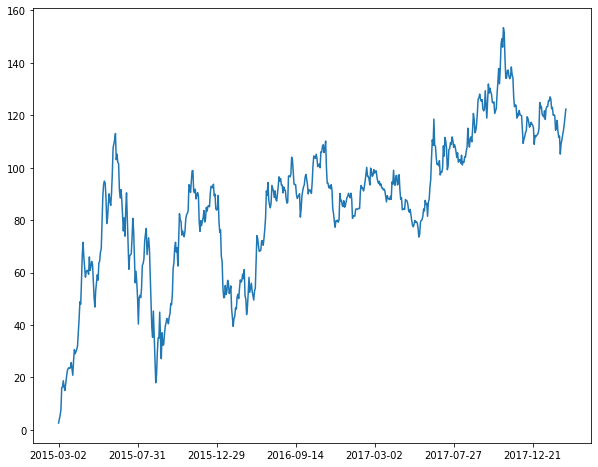

In [100]:
# 使用Pandas自带的画图api
stock_rise.cumsum().plot(figsize=(10,8))

### 自定义运算apply
* apply(func, axis=0)
    * func:自定义函数
    * axis：axis=0表示跨行操作，axis=1表示跨列操作

* 假设我们想要知道'open'和'close'两列的最大值减去最小值的值

In [102]:
# 我们首先定义个lambda函数，然后使用apply函数
data[['open', 'close']].apply(lambda x: x.max() - x.min(), axis=0)

open     22.74
close    22.85
dtype: float64

# Pandas 画图
* Pandas自带的画图api是在matplotlib库的基础上集成的，详细内容可以查看matplotlib的文档

* DataFrame.plot(kind='line')
    * kind : str，需要绘制图形的种类
        * ‘line’ : 折线图 (default)
        * ‘bar’ : 竖直柱状图
        * ‘barh’ : 水平柱状图
        * ‘hist’ : 直方图
        * ‘pie’ : 饼状图
        * ‘scatter’ : 散点图
        
    * 其他详细参数可以查看文档

* 现在我们想要画出'close'收盘价的折线图

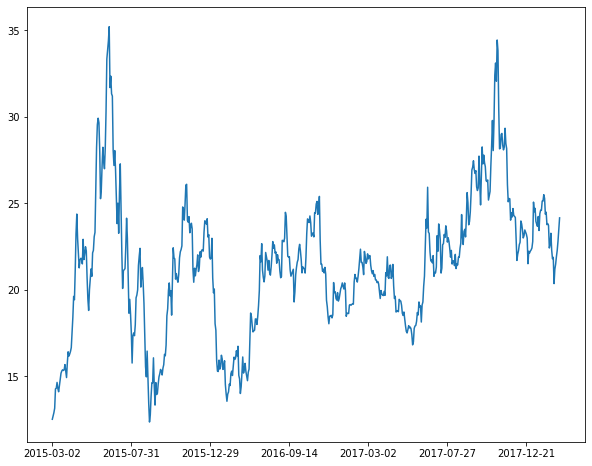

In [103]:
data['close'].plot(figsize=(10,8))

# Pandas 文件操作

我们的数据大部分存储于文件当中，所以pandas可以支持复杂的IO操作，pandas的API支持众多的文件格式，如CSV，SQL，Excel，JSON，HDF5。下图整理了常用的文件操作，其中CSV文件操作是最常用的，它可以处理常见的csv文件和txt文件。

| Format Type | Data Description | Reader | Writer |
| :-----:|:-----:|:-----:|:-----:|
|text   |CSV            |read_csv|   to_csv  |
|text   |JSON           |read_json|   to_json  |
|text   |HTML           |read_html|   to_html  |
|text   |local clipboard   |read_clipboard|   to_clipboard  |
|binary   |MS Excel        |read_excel|   to_excel  |
|binary   |HDF5           |read_hdf|   to_hdf  |
|binary   |Feather         |read_feather|   to_feather  |
|binary   |Stata          |read_stata|   to_stata  |
|binary   |SAS            |read_sas|    |
|binary   |Python Pickle     |read_pickle|   to_pickle  |
|sql   |SQL            |read_sql|   to_sql  |
|sql   |Google Big Query   |read_gbq|   to_gbq  |



## CSV文件(或txt文件)

可以使用read_csv函数读取csv文件或者txt文件，如果txt文件有自定义的分隔符，可以用read_csv里的‘sep’参数进行分隔符设置即可。

### read_csv
* pandas.read_csv(filepath_or_buffer, sep =',', usecols )
    * filepath_or_buffer:文件路径
    * sep :分隔符，默认用","隔开
    * usecols:指定读取的列名，列表形式


* 举例：读取之前股票的数据

In [104]:
# 读取文件，并且只获取‘open’和‘close’列
data_csv = pd.read_csv("./data/stock_day.csv",usecols=['open','close'])
data_csv

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82
2018-02-22,22.25,22.28
2018-02-14,21.49,21.92
...,...,...
2015-03-06,13.17,14.28
2015-03-05,12.88,13.16
2015-03-04,12.80,12.90
2015-03-03,12.52,12.70


### to_csv
* DataFrame.to_csv(path_or_buf=None, sep=',’, columns=None, header=True, index=True, mode='w', encoding=None)
    * path_or_buf :文件路径
    * sep :分隔符，默认用","隔开
    * columns :选择需要的列索引
    * header :boolean or list of string, 是否写进列索引值，默认是True
    * index:是否写进行索引，默认是True
    * index_label:确定索引的名称
    * mode:'w'：重写, 'a' 追加, 默认是‘w’


* 举例：保存读取出来的股票数据


In [105]:
# 选取10行数据保存
data_csv[:10].to_csv('./data/test_csv.csv',columns=['open'],index_label='date')

In [106]:
# 读取保存的文件并查看
pd.read_csv('./data/test_csv.csv')

,date,open
0,2018-02-27,23.53
1,2018-02-26,22.80
2,2018-02-23,22.88
3,2018-02-22,22.25
4,2018-02-14,21.49
5,2018-02-13,21.40
6,2018-02-12,20.70
7,2018-02-09,21.20
8,2018-02-08,21.79
9,2018-02-07,22.69


In [107]:
# 如果想把date保存在索引列中,使用index_col即可
pd.read_csv('./data/test_csv.csv',index_col='date')

,open
date,
2018-02-27,23.53
2018-02-26,22.80
2018-02-23,22.88
2018-02-22,22.25
2018-02-14,21.49
2018-02-13,21.40
2018-02-12,20.70
2018-02-09,21.20
2018-02-08,21.79


## 数据库交互
在实际使用场景中，大部分数据并不是存储在txt或者csv文件中，而是一些基于SQL语言的关系型数据库中，比如MySQL，下面的案例展示了如何连接SQL数据库，并把表导入到DataFrame中。

In [108]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine

In [109]:
# 初始化数据库连接
engine = create_engine('mysql+pymysql://root:@localhost:3306/db2')

# 查询语句
sql = 'select * from grade;'

# 读取表格
df = pd.read_sql(sql,engine)
df

,id,subject,grade
0,201,Chinese,85
1,202,Chinese,98
2,302,Chinese,87


# Pandas 缺失值处理

在处理大规模数据时，缺失数据是经常发生的。Pandas的目标之一就是尽量轻松地处理缺失数据。例如，pandas的所有描述性统计默认都不包括缺失数据。
对于数值数据，pandas使用浮点值NaN（Not a Number）表示缺失数据。

## 什么是缺失值？

缺失值是指原始数据中由于缺少信息而造成的数据的聚类、分组、删失或截断。它指的是现有数据集中某个或某些属性的值是不完全的。

缺失值的产生的原因多种多样，主要分为机械原因和人为原因。
* 机械原因是由于机械原因导致的数据收集或保存的失败造成的数据缺失，比如数据存储的失败，存储器损坏，机械故障导致某段时间数据未能收集（对于定时数据采集而言）。
* 人为原因是由于人的主观失误、历史局限或有意隐瞒造成的数据缺失，比如，在市场调查中被访人拒绝透露相关问题的答案，或者回答的问题是无效的，数据录入人员失误漏录了数据。

## 如何处理缺失值？

主要的步骤分为3步：
* 获取缺失值的标记方式并进行处理成NaN
* 判断数据中是否包含NaN
* 处理NaN格式数据（删除或替换）

* 1.获取缺失值的标记方式并进行处理成NaN格式
    * 不同数据集标记缺失值的方式可能会有不同
        * 通常而言，缺失值会标记为空值（Null或None）：pandas导入会直接标记成NaN
        * 有些缺失值会经过人为的标记，比如‘？’等，这时我们需要把‘？’统一替换成NaN，方便后面进行处理：df.replace(to_replace=,value=)
            * to_replace:替换前的值
            * value:替换后的值
* 2. 判断数据中是否包含NaN（常用的方法包含两种）
    * 使用df.info()方法查看数据的概览，其中的一列‘Non-Null Count’可以查看非空的数量，观察每一列的数量是否相等。
    * 使用pandas的api进行查看
        * pd.isnull(df)
        * pd.notnull(df)
* 3. 处理NaN格式数据（删除或替换）
    * 删除NaN：df.dropna(axis='rows')
        * 注：不会修改原数据，需要接受返回值
    * 替换NaN:df.fillna(value, inplace=True)
        * value：替换成的值
        * inplace：是否修改原数据
            * True:会修改原数据
            * False：不修改原数据，生成新的对象，在新的对象上进行替换


## 缺失值处理案例

* 接下来我们用一个真实的数据集来演示如何处理缺失值，IMDB电影数据集

In [110]:
# 读取电影数据集,默认的encoding读取格式为utf-8会报错，修改编码格式即可
movie = pd.read_csv('./data/IMDB-Movie-Data.csv',encoding="gbk")
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,?,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,NaN
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### 获取缺失值的标记方式

通常而言，缺失值的标记方式可从数据提供方的说明文档中获取。

* 如果没有的话，可以通过观察数据来获取缺失值的标记，比如我们通过观察数据发现第6行的最后一列有一个‘？’，我们就可以认为‘？’也是缺失数据的标记的一种。

* 我们也可以通过经验对数据进行分析来判断某一列是否存在其他缺失值的标记方式，下面举例说明。

In [111]:
# 我们先查看数据集的概览
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   object 
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           934 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


* 我们通过查看数据集的概览可以发现，第7列应该存在问题，因为第7列Runtime（电影的时长）按照经验来说应该是一个int格式，并且包含了1000行（表示没有空值），所以可以粗略判断出该列应该存在一些格式问题，我们查看该列的数据，果然发现第一行存在一个‘？’，所以我们判断‘？’是该数据集缺失值的另一种标记方式，我们使用df.replace()函数进行替换。

* 接下来，我们查看第10列和第11列，我们发现Non-Null Count值不是满值1000，表示这两列存在空值（即缺失值），初步的分析就结束了。

In [112]:
# 替换‘？’变为np.nan
movie = movie.replace(to_replace='?',value=np.nan)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   999 non-null    object 
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           934 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


### 判断是否包含缺失值

判断是否包含缺失值通常有两种方法，在上一小节，我们就用了第一种方法来迅速判断数据集中是否包含缺失值。

* 使用df.info()方法查看数据的概览，其中的一列‘Non-Null Count’可以查看非空的数量，观察每一列的数量是否相等。
* 使用pandas的api进行查看
    * pd.isnull(df)
    * pd.notnull(df)

In [113]:
# 使用pandas的api来判断是否包含NaN值
pd.isnull(movie).sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       1
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              66
dtype: int64

### 处理NaN值
通常而言，有两种方式处理缺失值，删除或者替换。
* 删除NaN：df.dropna(axis='rows')
    * 注：不会修改原数据，需要接受返回值
* 替换NaN:df.fillna(value, inplace=True)
    * value：替换成的值
    * inplace：是否修改原数据
        * True:会修改原数据
        * False：不修改原数据，生成新的对象，在新的对象上进行替换

In [114]:
# 删除NaN值
movie_data = movie.dropna()
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 1 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                835 non-null    int64  
 1   Title               835 non-null    object 
 2   Genre               835 non-null    object 
 3   Description         835 non-null    object 
 4   Director            835 non-null    object 
 5   Actors              835 non-null    object 
 6   Year                835 non-null    int64  
 7   Runtime (Minutes)   835 non-null    object 
 8   Rating              835 non-null    float64
 9   Votes               835 non-null    int64  
 10  Revenue (Millions)  835 non-null    float64
 11  Metascore           835 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 84.8+ KB


In [115]:
# 替换缺失值，使用均值进行填充其中一列
movie['Revenue (Millions)'].fillna(movie['Revenue (Millions)'].mean(), inplace=True)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   999 non-null    object 
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           934 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


# Pandas 数据离散化

连续属性离散化的目的是为了简化数据结构，数据离散化技术可以用来减少给定连续属性值的个数。离散化方法经常作为数据挖掘的工具。

## 什么是数据的离散化

**连续属性的离散化就是在连续属性的值域上，将值域划分为若干个离散的区间，最后用不同的符号或整数 值代表落在每个子区间中的属性值。**

离散化有很多种方法，这使用一种最简单的方式去操作

* 原始人的身高数据：165，174，160，180，159，163，192，184
* 假设按照身高分几个区间段：150-165, 165-180,180-195

这样我们将数据分到了三个区间段，我可以对应的标记为矮、中、高三个类别，最终要处理成一个"哑变量"矩阵

## cut和qcut实现数据分组

cut函数是按照数据的值进行分割，而qcut函数则是根据数据本身的数量来对数据进行分割

* pd.cut(data,bins)
    * bins：整数或者分组区间
        * 整数：分成几份，并使每组值的范围大致相等
        * 分组区间：比如，[-100, -3, 0, 3, 100]


* pd.qcut(data,q)
    * q: 整数或者分位数列表
        * 整数：表示分为q份，并且尽量保证每个分组里变量的个数相同
        * 分位数列表：比如[0,0.25,0.75，1]
        
* 注意：经常与value_counts()搭配使用，统计每组的个数

下面用股票数据进行演示：

In [116]:
# 导入股票数据
stock_data = pd.read_csv('./data/stock_day.csv')

# 筛选出p_change数据
p_change = stock_data['p_change']
p_change

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
              ... 
2015-03-06    8.51
2015-03-05    2.02
2015-03-04    1.57
2015-03-03    1.44
2015-03-02    2.62
Name: p_change, Length: 643, dtype: float64

In [117]:
p_change.describe()

count    643.000000
mean       0.190280
std        4.079698
min      -10.030000
25%       -1.850000
50%        0.260000
75%        2.305000
max       10.030000
Name: p_change, dtype: float64

In [118]:
# 自己指定分组区间，进行分组
bins = [-11, -7, -5, -3, 0, 3, 5, 7, 11]
p_counts = pd.cut(p_change,bins)

# 查看每个区间变量的个数
p_counts.value_counts()

(0, 3]       215
(-3, 0]      188
(3, 5]        57
(-5, -3]      51
(7, 11]       35
(5, 7]        35
(-11, -7]     34
(-7, -5]      28
Name: p_change, dtype: int64

In [119]:
# 使用qcut进行分组,分成10组，保证每组变量的个数大致相等
q_counts = pd.qcut(p_change,10)
q_counts.value_counts()

(5.27, 10.03]                    65
(0.26, 0.94]                     65
(-0.462, 0.26]                   65
(-10.030999999999999, -4.836]    65
(2.938, 5.27]                    64
(1.738, 2.938]                   64
(-1.352, -0.462]                 64
(-2.444, -1.352]                 64
(-4.836, -2.444]                 64
(0.94, 1.738]                    63
Name: p_change, dtype: int64

## get_dummies实现one-hot编码

* **什么是one-hot编码？**
    
把每个类别生成一个布尔列，这些列中只有一列可以为这个样本取值为1.其又被称为独热编码（One-Hot Encoding）。

* 为什么要使用one-hot编码？

使用one-hot编码后，离散特征会通过one-hot编码映射到欧式空间，会让特征之间的距离计算更加合理。因为在回归，分类，聚类等机器学习算法中，特征之间距离的计算或相似度的计算是非常重要的，而我们常用的距离或相似度的计算都是在欧式空间的相似度计算。

* pandas.get_dummies(data, prefix=None)
    * data:array-like, Series, or DataFrame
    * prefix:分组名字

下面举例说明：

In [120]:
# 新建一个类别型数据，包含城市名
cities = pd.Series(['北京','上海','深圳','广州','北京'])
cities

0    北京
1    上海
2    深圳
3    广州
4    北京
dtype: object

In [121]:
# 得出One-Hot编码矩阵
dummies = pd.get_dummies(cities,prefix='city')
dummies

,city_上海,city_北京,city_广州,city_深圳
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


城市的One-Hot编码如下：
* 上海：1000
* 北京：0100
* 广州：0010
* 深圳：0001

* One-Hot编码优缺点：
    * 优点：独热编码解决了分类器不好处理属性数据的问题，在一定程度上也起到了扩充特征的作用。它的值只有0和1，不同的类型存储在垂直的空间。
    * 缺点：当类别的数量很多时，特征空间会变得非常大。在这种情况下，一般可以用PCA来减少维度。而且one hot encoding+PCA这种组合在实际中也非常有用。

# Pandas 数据合并与数据重塑

如果你的数据由多张表组成，那么有时候需要将不同的数据表合并在一起分析,pandas常用的方法分为两类：数据合并和数据重塑。数据合并用于把不同的数据表合并到一个DataFrame中，数据重塑是合并后的DataFrame常拥有多层索引（多维），为了方便理解和计算，需要把多层索引（多维）转变为2维数据。

* 数据合并：合并多张数据表
    * pd.concat:可以沿着一条轴将多个对象堆叠在一起，常用于实现列的合并
    * pd.merge：可根据一个或多个键将不同DataFrame中的行连接起来，类似于数据库的join操作


* 数据重塑：用于重新排列表格型数据
    * df.stack：将数据的列旋转为行
    * df.unstack：将数据的行旋转为列

## pd.concat

* pd.concat([data1, data2], axis=0,join='outer')
    * axis默认为0，表示跨行进行合并，所以是行合并
    * join默认是'outer'外连接，可以选择‘inner’内连接

举例：对股票数据进行分组，然后进行One-Hot编码，在与原数据合并

In [122]:
# 查看之前的stock_data
stock_data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76


In [123]:
# 查看之前筛选出的p_change列数据
p_change

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
              ... 
2015-03-06    8.51
2015-03-05    2.02
2015-03-04    1.57
2015-03-03    1.44
2015-03-02    2.62
Name: p_change, Length: 643, dtype: float64

In [124]:
# 我们使用qcut进行分组
q_counts = pd.qcut(p_change,10)
q_counts

2018-02-27    (1.738, 2.938]
2018-02-26     (2.938, 5.27]
2018-02-23    (1.738, 2.938]
2018-02-22     (0.94, 1.738]
2018-02-14    (1.738, 2.938]
                   ...      
2015-03-06     (5.27, 10.03]
2015-03-05    (1.738, 2.938]
2015-03-04     (0.94, 1.738]
2015-03-03     (0.94, 1.738]
2015-03-02    (1.738, 2.938]
Name: p_change, Length: 643, dtype: category
Categories (10, interval[float64]): [(-10.030999999999999, -4.836] < (-4.836, -2.444] < (-2.444, -1.352] < (-1.352, -0.462] ... (0.94, 1.738] < (1.738, 2.938] < (2.938, 5.27] < (5.27, 10.03]]

In [125]:
# 使用get_dummies进行One-Hot编码
dummies = pd.get_dummies(q_counts,prefix='rise')
dummies

,"rise_(-10.030999999999999, -4.836]","rise_(-4.836, -2.444]","rise_(-2.444, -1.352]","rise_(-1.352, -0.462]","rise_(-0.462, 0.26]","rise_(0.26, 0.94]","rise_(0.94, 1.738]","rise_(1.738, 2.938]","rise_(2.938, 5.27]","rise_(5.27, 10.03]"
2018-02-27,0,0,0,0,0,0,0,1,0,0
2018-02-26,0,0,0,0,0,0,0,0,1,0
2018-02-23,0,0,0,0,0,0,0,1,0,0
2018-02-22,0,0,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2015-03-06,0,0,0,0,0,0,0,0,0,1
2015-03-05,0,0,0,0,0,0,0,1,0,0
2015-03-04,0,0,0,0,0,0,1,0,0,0
2015-03-03,0,0,0,0,0,0,1,0,0,0


In [126]:
# 使用pd.concat进行数据的合并
pd.concat([stock_data,dummies],axis=1)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,"rise_(-10.030999999999999, -4.836]","rise_(-4.836, -2.444]","rise_(-2.444, -1.352]","rise_(-1.352, -0.462]","rise_(-0.462, 0.26]","rise_(0.26, 0.94]","rise_(0.94, 1.738]","rise_(1.738, 2.938]","rise_(2.938, 5.27]","rise_(5.27, 10.03]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,0,0,0,0,0,0,0,1,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,0,0,0,0,0,0,0,0,1,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,0,0,0,0,0,0,0,1,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,0,0,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,...,0,0,0,0,0,0,0,0,0,1
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,...,0,0,0,0,0,0,0,1,0,0
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,...,0,0,0,0,0,0,1,0,0,0
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,...,0,0,0,0,0,0,1,0,0,0


## pd.merge
* pd.merge(left, right, how='inner', on=None)
    * left: DataFrame
    * right: 另一个DataFrame
    * how:按照什么方式连接,['left', 'right', 'outer', 'inner'],默认'inner'
        * 注意：使用外连接，经常会出现缺失值NaN
    * on: 指定的共同键
        * 注意：如果左右两表共同键名字不同，可以选择‘left_on’和‘right_on’参数分别指定左右两表的连接键


下面举例演示pd.merge方法合并数据集：

In [127]:
# 新建左表
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [128]:
# 新建右表
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [129]:
# 使用默认内连接,共同键为'key1'和'key2'
pd.merge(left,right,on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [130]:
# 使用外连接，共同键为'key1'和'key2'
pd.merge(left,right,on=['key1','key2'],how='outer')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


## stack

* 将列索引旋转为行索引，完成层级索引
* DataFrame->Series

下面举例说明stack，完成层级索引：

In [131]:
# 新建一个成绩的数据表
df = pd.DataFrame(np.random.randint(0,100, (5,2)), columns=['Chinese', 'English'])
df

,Chinese,English
0,9,68
1,44,89
2,28,89
3,15,10
4,6,21


In [132]:
# 使用stack完成层级索引
stacked = df.stack()
stacked

0  Chinese     9
   English    68
1  Chinese    44
   English    89
2  Chinese    28
   English    89
3  Chinese    15
   English    10
4  Chinese     6
   English    21
dtype: int32

* stacked共有两层索引：
    * 0层索引即是[0,1,2,3,4]那一列
    * 1层索引即是包含['Chinese','English']那一列

## unstack

* 将层级索引展开
* Series->DataFrame
* 默认操作内层索引，即level=-1

In [133]:
# 默认操作内层索引，即level=1或-1
stacked.unstack()

,Chinese,English
0,9,68
1,44,89
2,28,89
3,15,10
4,6,21


In [134]:
# 操作外层索引，即level=0
stacked.unstack(level=0)

,0,1,2,3,4
Chinese,9,44,28,15,6
English,68,89,89,10,21


# Pandas 交叉表与透视表

* 交叉表（cross-tabulation，简称crosstab）是一种用于计算分组频率的特殊透视表
* 透视表（pivot table）是一种常见的数据汇总工具，它根据一个或多个键对数据进行聚合，并根据行和列上的分组键将数据分配到各个矩形区域中。

## 交叉表与透视表的作用
* 交叉表：交叉表用于计算一列数据对于另外一列数据的分组个数
    * 用于统计分组频率的特殊透视表
    * pd.crosstab(value1, value2)
    
    
* 透视表：透视表是将原有的DataFrame的列分别作为行索引和列索引，然后对指定的列应用聚集函数
    * df.pivot_table(values,index,columns,aggfunc='mean'）

## 案例分析

我们使用股票数据(stock_data),假设现在我们想要知道在不同工作日（周一到周五）时，这只股票是涨是跌？比如，在周一这只股票有53%的概率涨了，47%的概率跌了，这样类似的数据。

* 第一种思路：
    * 1.首先需要把日期转换为星期几，然后合并到原表中
    * 2.股票涨跌的数据是在‘p_change’列，我们需要新加一列来判断，如果p_change大于0，结果就为1，否则为0
    * 3. 使用交叉表crosstab来寻找两列的数据个数关系
    * 4. 然后进行算术运算，算出比例

In [135]:
stock_data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76


In [136]:
# 筛选有用的列，形成新的DataFrame
data = pd.DataFrame(stock_data.loc[:,'p_change'])
data

,p_change
2018-02-27,2.68
2018-02-26,3.02
2018-02-23,2.42
2018-02-22,1.64
2018-02-14,2.05
...,...
2015-03-06,8.51
2015-03-05,2.02
2015-03-04,1.57
2015-03-03,1.44


In [137]:
# 转换日期变为星期几
date = pd.to_datetime(data.index).weekday
data['weekday'] = date
data.head()

,p_change,weekday
2018-02-27,2.68,1
2018-02-26,3.02,0
2018-02-23,2.42,4
2018-02-22,1.64,3
2018-02-14,2.05,2


In [138]:
# 新增一列，根据p_change来判断股票是否涨跌
data['pos_neg'] = np.where(data['p_change'] > 0, 1, 0)
data.head(10)

,p_change,weekday,pos_neg
2018-02-27,2.68,1,1
2018-02-26,3.02,0,1
2018-02-23,2.42,4,1
2018-02-22,1.64,3,1
2018-02-14,2.05,2,1
2018-02-13,1.32,1,1
2018-02-12,4.03,0,1
2018-02-09,-6.86,4,0
2018-02-08,0.41,3,1
2018-02-07,-2.24,2,0


In [139]:
# 通过交叉表来找寻两列数据个数的关系
count = pd.crosstab(data['weekday'],data['pos_neg'])
count

pos_neg,0,1
weekday,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [140]:
# 算术运算，先求和
sum = count.sum(axis=1)
sum

weekday
0    125
1    131
2    132
3    128
4    127
dtype: int64

In [141]:
# 进行相除操作，得出比例
result = count.div(sum,axis=0)
result

pos_neg,0,1
weekday,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


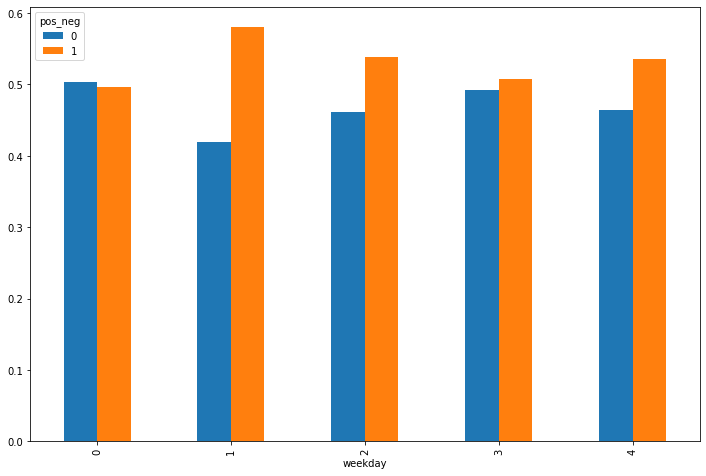

In [142]:
# 画出柱状图来显示结果
result.plot(kind='bar',figsize=(12,8))

我们经过统计计算发现，星期二这只股票涨的概率为58%，是为最大。

* 第二种思路：
    * 直接使用透视表（pivot table），更加简单

In [143]:
# 使用pivot table进行操作
data.pivot_table(['pos_neg'],index='weekday')

,pos_neg
weekday,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


假设我们现在还想要知道，这只股票周一到周五，如果涨了的话，平均涨了多少（或者一共涨了多少），如果跌了，平均跌了多少（或者一共跌了多少）

In [144]:
# 使用pivot_table进行计算平均值
data.pivot_table(['p_change'],index='weekday',columns='pos_neg')

p_change          
pos_neg         0         1
weekday                    
0       -3.800476  2.764516
1       -3.212727  3.100526
2       -2.628525  2.897042
3       -2.537778  3.537231
4       -2.878644  2.733676

In [145]:
# 使用pivot_table进行计算sum
data.pivot_table(['p_change'],index='weekday',columns='pos_neg',aggfunc='sum')

p_change        
pos_neg        0       1
weekday                 
0        -239.43  171.40
1        -176.70  235.64
2        -160.34  205.69
3        -159.88  229.92
4        -169.84  185.89

# Pandas 分组与聚合

分组与聚合通常是分析数据的一种方式，通常与一些统计函数一起使用，查看数据的分组情况。

想一想其实上一节的交叉表与透视表也有分组的功能，所以算是分组的一种形式，只不过他们主要是计算次数或者计算比例。

## 什么是分组聚合

一个表示分组聚合运算的术语"split-apply-combine"（拆分-应用-合并）共三个阶段。
* split：在第一个阶段，pandas对象（Series或者DataFrame）中的数据会根据你提供的一个或多个键被拆分（split）为多组。
* apply：在第二个阶段，将一个函数应用（apply）到各个分组并产生一个新值。
* combine：在第三个阶段，所有这些函数的执行结果会被合并（combine）到最终的结果对象中。

举例：假如有这样一组数据,分别求ABC组的和。

| key | data |
| :-----:| :----: |
| A | 0 |
| B | 5 |
| C | 10 |
| A | 5 |
| B | 10 |
| C | 15 |
| A | 10 |
| B | 15 |
| C | 20 |

* 1. split：将这份数据按照'key'键拆分成3组

| key | data |
| :-----:| :----: |
| A | 0 |
| A | 5 | 
| A | 10 | 

| key | data |
| :-----:| :----: |
| B | 5 |
| B | 10 | 
| B | 15 | 

| key | data |
| :-----:| :----: |
| C | 10 |
| C | 15 | 
| C | 20 | 

* 2. apply:将函数sum应用到每一组，分别计算结果。

| key | sum |
| :-----:| :----: |
| A | 15 |

| key | sum |
| :-----:| :----: |
| B | 30 |

| key | sum |
| :-----:| :----: |
| C | 45 |


* 3. combine：将每组的结果合并到一起。

| key | sum |
| :-----:| :----: |
| A | 15 |
| B | 30 | 
| C | 45 | 

## 分组grouoby

pandas实现分组操作的是groupby函数

* df.groupby(by=None)
    * by: 根据什么进行分组，用于确定groupby的组

举例说明：

In [147]:
# 新建一个DataFrame
df1 = pd.DataFrame({'fruit':['apple','banana','orange','apple','banana'],
                    'color':['red','yellow','yellow','cyan','cyan'],
                   'price':[8.5,6.8,5.6,7.8,6.4]})
df1

,fruit,color,price
0,apple,red,8.5
1,banana,yellow,6.8
2,orange,yellow,5.6
3,apple,cyan,7.8
4,banana,cyan,6.4


In [148]:
# 对‘fruit’列进行分组，查看其类型
type(df1.groupby('fruit'))

pandas.core.groupby.generic.DataFrameGroupBy

* pandas.core.groupby.generic.DataFrameGroupBy 是一个Groupby对象，它是一个包含组名和数据块的2维元祖序列，支持迭代（可使用for循环进行迭代）

In [153]:
# 对groupby对象进行迭代
for name, group in df1.groupby('fruit'):
    print(name)
    print(group)
    print('-------------------------')  

apple
   fruit color  price
0  apple   red    8.5
3  apple  cyan    7.8
-------------------------
banana
    fruit   color  price
1  banana  yellow    6.8
4  banana    cyan    6.4
-------------------------
orange
    fruit   color  price
2  orange  yellow    5.6
-------------------------


## 聚合函数
* 常见的聚合函数如下表所示：

| 函数名 | 描述 | 
| :--- | :--- | 
| count | 分组中非NA值的数量 | 
| sum | 非NA值的和 | 
| mean | 非NA值的平均值 | 
| median | 非NA值的中位数 | 
| std, var | 标准差和方差 | 
| min, max | 非NA的最小值，最大值 | 
| prod | 非NA值的乘积 |
| first, last | 非NA值的第一个,最后一个 |

* 上表显示的是pandas已封装好的聚合函数，也可以自定义聚合函数，将函数传递给agg函数即可。


* 举例说明：

In [154]:
# 假设我们想要根据fruit来求price的平均值
df1['price'].groupby(df1['fruit']).mean()

fruit
apple     8.15
banana    6.60
orange    5.60
Name: price, dtype: float64

In [155]:
# 假设我们想要得到每种水果价格最大值和最小值的差值,把自定义的聚合函数传入agg参数即可
df1['price'].groupby(df1['fruit']).agg(lambda x: x.max() - x.min())

fruit
apple     0.7
banana    0.4
orange    0.0
Name: price, dtype: float64

# Pandas 时间序列

时间序列（time series）数据是一种重要的结构化数据形式，。在多个时间点观察或测量到的任何时间都可以形成一段时间序列。很多时间， 时间序列是固定频率的， 也就是说， 数据点是根据某种规律定期出现的（比如每15秒。。。。）。时间序列也可以是不定期的。时间序列数据的意义取决于具体的应用场景。主要由以下几种：

* 时间戳（timestamp），特定的时刻。
* 固定时期（period），如2007年1月或2010年全年。
* 时间间隔（interval），由起始和结束时间戳表示。时期（period）可以被看做间隔（interval）的特例。

## 时间和日期数据类型及其工具
Python标准库包含用于日期（date）和时间（time）数据的数据类型，而且还有日历方面的功能。我们主要会用到datetime、time以及calendar模块。datetime.datetime（也可以简写为datetime）是用得最多的数据类型：

In [156]:
from datetime import datetime

# 可以获取当前的时间
now = datetime.now()
now

datetime.datetime(2022, 2, 9, 14, 26, 52, 697131)

In [159]:
# 可以直接提取时间的年、月、日、小时等
now.year, now.month, now.day, now.hour

(2022, 2, 9, 14)

* datetime以毫秒形式存储日期和时间。timedelta表示两个datetime对象之间的时间差：

In [160]:
# 获取时间差
delta = datetime(2022, 1, 7) - datetime(2012, 6, 24, 8, 15)
delta

datetime.timedelta(days=3483, seconds=56700)

* 可以给datetime对象加上（或减去）一个或多个timedelta，这样会产生一个新对象：

In [161]:
from datetime import timedelta

# 进行时间的加减
datetime(2011, 1, 7) + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

### 字符串和datetime的相互转换

* 利用str或strftime方法（传入一个格式化字符串），datetime对象和pandas的Timestamp对象（稍后就会介绍）可以被格式化为字符串：

In [162]:
# 新建一个时间点
stamp = datetime(2022,1,1)
str(stamp)

'2022-01-01 00:00:00'

In [167]:
# 可以使用strftime进行转换
stamp.strftime('%Y-%m-%d')

'2022-01-01-00'

* 常见的转换格式如下表所示：

|代码|说明|
|:--:|:--:|
|%Y |4位数的年|
|%y |2位数的年|
|%m |2位数的月[01,12]|
|%d |2位数的日[01,31]|
|%H |时（24小时制）[00,23]|
|%M |2位数的分[00,59]|
|%S |秒[00,60]|
|%w |星期几[0(星期天，6)]|
|%F |'%Y-%m-%d'简写形式，例如2012-04-18|
|%D |'%m/%d/%y'简写形式，例如04/18/12|


* datetime.strptime可以用这些格式化编码将字符串转换为日期：

In [169]:
# 使用strptime把字符串格式转换为datetime格式
date = '7/6/2011'
datetime.strptime(date,'%m/%d/%Y')

datetime.datetime(2011, 7, 6, 0, 0)

* datetime.strptime是通过已知格式进行日期解析的最佳方式。但是每次都要编写格式定义是很麻烦的事情，尤其是对于一些常见的日期格式。这种情况下，你可以用dateutil这个第三方包中的parser.parse方法,可以自动解析常见的日期格式：

In [172]:
from dateutil import parser

# 自动解析日期为datetime格式
parser.parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

* dateutil可以解析几乎所有人类能够理解的日期表示形式：

In [173]:
# 尝试解析一个描述日期的字符串
parser.parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

* 在国际通用的格式中，日出现在月的前面很普遍，传入dayfirst=True即可解决这个问题：

In [174]:
# 传入dayfirst参数即可解决“日出现在月”的问题
parser.parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

* pandas通常是用于处理成组日期的，不管这些日期是DataFrame的轴索引还是列。to_datetime方法可以解析多种不同的日期表示形式。对标准日期格式（如ISO8601）的解析非常快：

In [175]:
# 使用pd.to_datetime方法来处理一组日期数据
dates = ['2022-01-01 12:00:00', '2021-12-31 00:00:00']
pd.to_datetime(dates)

DatetimeIndex(['2022-01-01 12:00:00', '2021-12-31 00:00:00'], dtype='datetime64[ns]', freq=None)

* 它还可以处理缺失值（None、空字符串等）：
* 注意：NaT（Not a Time）是pandas中时间戳数据的null值。

In [176]:
# 新建一个包含None的日期数据
dates = pd.to_datetime(dates + [None])
dates

DatetimeIndex(['2022-01-01 12:00:00', '2021-12-31 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [177]:
# 使用pd.isnull判断是否包含缺失值
pd.isnull(dates)

array([False, False,  True])

## Pandas时间序列基础

pandas最基本的时间序列类型就是以时间戳（通常以Python字符串或datatime对象表示）为索引的Series：

In [179]:
# 新建一组时间序列数据
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

# 以这组时间序列为索引，构建一份数据
ts = pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02   -0.088118
2011-01-05    1.254329
2011-01-07   -1.181770
2011-01-08   -0.893920
2011-01-10    0.672332
2011-01-12   -0.942009
dtype: float64

* 这些datetime对象实际上是被放在一个DatetimeIndex中的：

In [180]:
# 显示索引
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

* 你可以直接传入日期来选取数据

In [182]:
# 假设现在获取‘2011-01-05’的数据
ts['2011-01-05']

1.2543286934501932

* 你还可以直接传入一个日期范围来选取数据

In [184]:
# 选取一个日期范围的数据
ts['2011-01-05':'2011-01-15']

2011-01-05    1.254329
2011-01-07   -1.181770
2011-01-08   -0.893920
2011-01-10    0.672332
2011-01-12   -0.942009
dtype: float64

## 生成日期范围

* 我们可以使用pandas.date_range可用于根据指定的频率生成指定长度的DatetimeIndex

In [186]:
# 生成一个日期范围
index = pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

* 默认情况下，date_range会产生按天计算的时间点。如果只传入起始或结束日期，那就还得传入一个表示一段时间的数字：

In [187]:
# 想要获取从2012-04-01之后的20天
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [188]:
# 想要获取从2012-06-01之前的20天
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

* 起始和结束日期定义了日期索引的严格边界。例如，如果你想要生成一个由每月最后一个工作日组成的日期索引，可以传入"BM"频率（表示business end of month），这样就只会包含时间间隔内（或刚好在边界上的）符合频率要求的日期：

In [189]:
# 现在想要获取2000年所有月份的最后一个工作日
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

* 常见的时间频率整理如下：

|别名|偏移量类型|说明|
|:--:|:--:|:--:|
| D  | Day | 每日历日|
| B  | BusinessDay | 每工作日|
| H  | Hour | 每小时|
| T或min  | Minute | 每分|
| S  | Second | 每秒|
| M  | MonthEnd | 每月最后一个日历日|
| BM  | BusinessMonthEnd | 每月最后一个工作日|
| MS  | MonthBegin | 每月第一个日历日|
| BMS  | BusinessMonthBegin | 每月第一个工作日|
| W-MON、W-TUE ...  | Week | 从指定的星期几(MON,TUE,WED...)开始算起，每周|
|WOM-1MON、WOM-2MON ...|WeekOfMonth|产生每月第一到第四的星期几。例如，WOM-3FRI表示每月第3个星期五|

## 重采样和频率转换

重采样（resampling）指的是将时间序列从一个频率转换到另一个频率的处理过程。将高频率数据聚合到低频率称为**降采样（downsampling）**，而将低频率数据转换到高频率则称为**升采样（upsampling）**。并不是所有的重采样都能被划分到这两个大类中。例如，将W-WED（每周三）转换为W-FRI既不是降采样也不是升采样。

pandas对象都带有一个**resample**方法，它是各种频率转换工作的主力函数。resample有一个类似于groupby的API，调用resample可以分组数据，然后会调用一个聚合函数：

In [191]:
# 我们新建一个时间序列数据
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -2.066486
2000-01-02   -1.875131
2000-01-03   -1.170532
2000-01-04    0.492544
2000-01-05    0.570057
                ...   
2000-04-05   -0.699043
2000-04-06   -0.204712
2000-04-07   -0.234665
2000-04-08   -1.639764
2000-04-09   -0.497266
Freq: D, Length: 100, dtype: float64

In [194]:
# 假设我们想要获取每月的平均值是多少
ts.resample('M',kind='period').mean()

2000-01   -0.253734
2000-02    0.184735
2000-03   -0.312310
2000-04   -0.359029
Freq: M, dtype: float64

# Pandas 案例讲解

现在我们有一组从2006年到2016年1000部最流行的电影数据，我们想要了解下面的3个问题：

* 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？


* 问题2：对于这一组电影数据，如果我们想获取rating的分布情况，应该如何呈现数据？


* 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

我们首先导入包和数据:

In [240]:
import pandas  as pd 
import numpy as np
from matplotlib import pyplot as plt

# 读取文件
movie_data = pd.read_csv('./data/IMDB-Movie-Data.csv',encoding='gbk')
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,?,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,NaN
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 问题1

我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

* 得出评分的平均分

In [198]:
# 运用mean函数计算平均分
movie_data['Rating'].mean()

6.723200000000003

* 得出导演人数信息：
导演可能会有重复，所以需要求出唯一值

In [203]:
# 使用np.unique()求出导演这一列的唯一值
np.unique(movie_data['Director']).shape[0]

644

## 问题2
对于这一组电影数据，如果我们想获取Rating的分布情况，应该如何呈现数据？

* 我们可以使用pandas内置的画图plot函数进行绘制

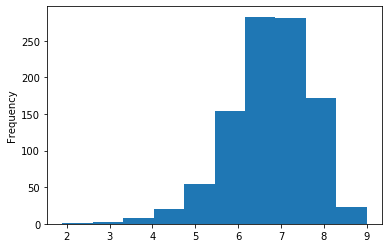

In [204]:
# 使用pandas的plot函数
movie_data['Rating'].plot(kind='hist')

* 现在我们觉得x轴的刻度不太准确，想要更精确一些。

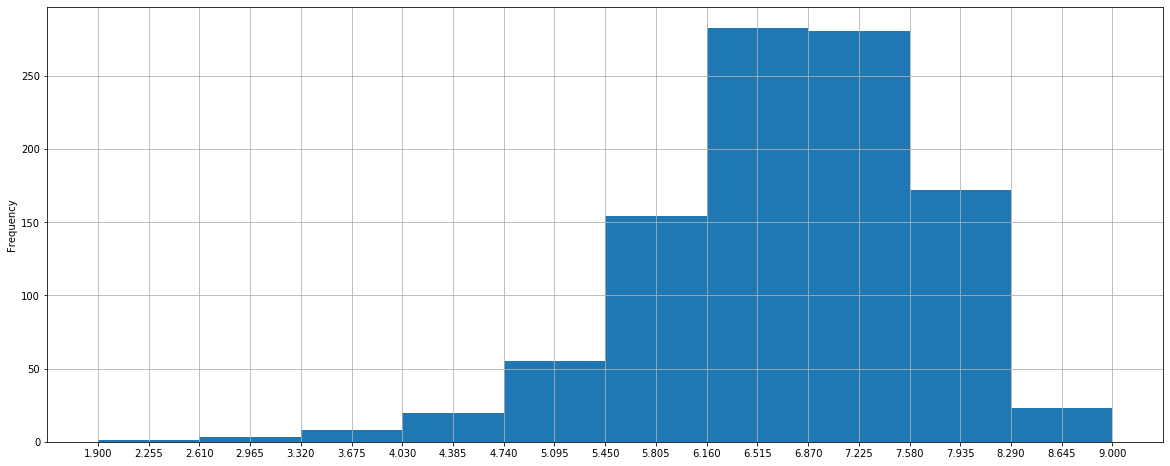

In [214]:
# 求出Rating的最大值和最小值
max_rating = movie_data['Rating'].max()
min_rating = movie_data['Rating'].min()

# 生成刻度列表
xticks = np.linspace(min_rating,max_rating,num=21)

# 再添加网格
movie_data['Rating'].plot(kind='hist',xticks=xticks,grid=True,figsize=(20,8))


## 问题3
对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

* 思路
    * 1. 首先我们观察数据，一个电影会包含多个电影分类，所以我们需要进行字符串分割，把所有的电影种类统计出来。
    * 2. 然后，我们可以建立一个全为0的DataFrame，列索引设为统计出来的电影种类，每一行代表一个电影，设为temp_df。
    * 3. 遍历每一个电影，在temp_df把电影出现的种类标为1。
    * 4. 进行求和，即可得出结果。

* 1. 统计所有的电影种类

In [218]:
# 对'Genre'列进行字符串分割，用一个temp_list保存临时变量
temp_list = [i.split(',') for i in movie_data['Genre']]
temp_list[:10]

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance']]

In [219]:
# 获取电影的分类
genre_list = np.unique([i for j in temp_list for i in j])
genre_list

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

* 2.新建一个全为0的DataFrame，用于后面的遍历电影种类，记录增量

In [220]:
# 新建一个全为0的DataFrame
temp_df = pd.DataFrame(np.zeros([movie_data.shape[0], genre_list.shape[0]]),columns=genre_list)
temp_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* 3.遍历每一个电影，在temp_df把电影出现的种类标为1

In [224]:
# 使用df.iloc对temp_df进行索引赋值
for i in range(movie_data.shape[0]):
    temp_df.iloc[i, temp_df.columns.get_indexer(temp_list[i])] = 1
    
temp_df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* 4. 进行求和并绘图展示

In [236]:
# 进行求和并排序
genre_sum = temp_df.sum().sort_values(ascending=False)
genre_sum

Drama        513.0
Action       303.0
Comedy       279.0
Adventure    259.0
Thriller     195.0
Crime        150.0
Romance      141.0
Sci-Fi       120.0
Horror       119.0
Mystery      106.0
Fantasy      101.0
Biography     81.0
Family        51.0
Animation     49.0
History       29.0
Sport         18.0
Music         16.0
War           13.0
Western        7.0
Musical        5.0
dtype: float64

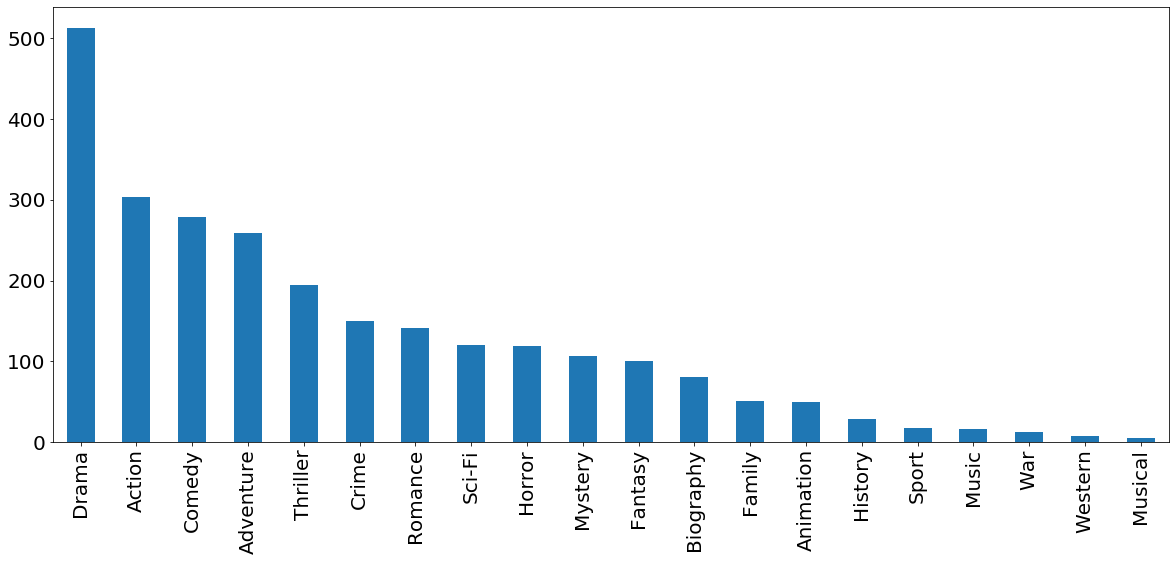

In [239]:
# 进行画图
genre_sum.plot(kind='bar',figsize=(20,8),fontsize=20)